В этом уроке поговорим о понятиях в машинном обучении, которые  пригодятся независимо от того, какую модель обучаем

* переобучение
* feature engineering

Так же обсудим такое важное понятие в машинном обучении как градиентный спуск

# Переобучение

Переобучение - это явление, когда модель "слишком сильно" подгоняется под обучающую выборку и плохо справляется с новыми данными - проведём эксперимент и увидим а примере линейной регрессии, как переобучаются модели

In [53]:
import numpy as np
import pandas as pd

data = pd.read_csv('data/non_linear.csv', sep=',')
data.head()

,x_train,y_train
0,0.138368,0.838812
1,0.157237,0.889313
2,0.188684,1.430040
3,0.685553,1.717309
4,0.874237,2.032588


Тренироваться будем на полиномиальной регрессии

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

def generate_degrees(source_data: list, degree: int):
    """Функция, которая принимает на вход одномерный массив, а возвращает n-мерный
    Для каждой степени от 1 до  degree возводим x в эту степень
    """
    return np.array([
          source_data**n for n in range(1, degree + 1)  
    ]).T

Обучаем модель на валидации, проверяем на контроле для степени полинома *degree=8*. Для разбиения мы воспользуемся функцией [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html):

* $X$ и $y$ - массивы, которые хотим расщепить на валидацию и контроль
* *test_size* принимает значения от нуля до единицы и означает долю объектов, которые нужно отложить на валидацию (обычно выбирают значения между $0.15$ и $0.35$)
* *random_state* - любое целое число, если задано то разбиение не будет меняться в разных запусках программы (нужно для воспроизводимости)
* параметр $\alpha=0$ чтобы исключить регуляризацию

In [55]:
degree = 8
X = generate_degrees(data['x_train'], degree)
y = data.y_train.values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
model = Ridge(alpha=0).fit(X_train, y_train)
y_pred = model.predict(X_valid)
y_pred_train = model.predict(X_train)
print("Качество на валидации: %.3f" % mean_squared_error(y_valid, y_pred))
print("Качество на обучении: %.3f" % mean_squared_error(y_train, y_pred_train))

Качество на валидации: 0.119
Качество на обучении: 0.052


/www/app/.venv/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.97797e-18): result may not be accurate.
  overwrite_a=True).T


Теперь обучим полиномиальную регрессию для степени *degree = 12* c параметром регуляризации *alpha=0*

In [56]:
degree = 12
X = generate_degrees(data['x_train'], degree)
y = data.y_train.values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
model = Ridge(alpha=0).fit(X_train, y_train)
y_pred = model.predict(X_valid)
y_pred_train = model.predict(X_train)
print("Качество на валидации: %.3f" % mean_squared_error(y_valid, y_pred))
print("Качество на обучении: %.3f" % mean_squared_error(y_train, y_pred_train))

Качество на валидации: 0.125
Качество на обучении: 0.051


Как изменилась ошибка на обучении? Было $0.052$, стало $0.051$, т.е. *ошибка на обучении падает*.

Как изменилась ошибка на валидации? Было $0.119$, стало $0.125$, т.е. *ошибка на валидации растёт*.

Это и есть признак переобучения - ошибка на валидации растёт, а на обучении падает, степень полинома $n=12$ хуже, чем степень полинома $n=8$, модель переобучилась.

### Домашняя работа: переобучение 

У класса *Ridge* в конструкторе есть параметр регуляризации - обучите регрессию при $\alpha=0.01$. 

Как изменилась ошибка на обучении? Как изменилась ошибка на валидации? Удалось ли победить переобучение?

In [57]:
# -- ВАШ КОД ТУТ --






# ------------------

### Вывод


Переобучение - это плохо. Детектировать можно с помощью валидационной выборки. Победить переобучение можно с помощью регуляризации в библиотечном классе Ridge

### Домашняя работа: Lasso vs Ridge

На данных из файла `data/non_linear.csv`
* сгенерируйте данные до степени *degree = 8* включительно
* обучите модель `sklearn.linear_model.Lasso` и модель `sklearn.linear_model.Ridge` на полученных данных
* используйте коэффициент регуляризации $\alpha=0.8$ для обеих моделей
* постройте два столбчатых графика, на которых отобразите величину коэффициентов в для Ridge регрессии и Lasso регрессии виде столбиков

Пример графиков для 3-й степени (просто для примера, у вас может по-другому выглядеть). Какой можно сделать в вывод по величине коэффициентов?:
![coeff_example](img/coeff_example.png)

In [58]:
# -- ВАШ КОД ТУТ ---



# ------------------

# Борьба с переобучением: регуляризация

Построим несколько моделей полиномиальной регрессии для разных степеней полинома, чтобы детектировать переобучение

In [59]:
data.head()

,x_train,y_train
0,0.138368,0.838812
1,0.157237,0.889313
2,0.188684,1.430040
3,0.685553,1.717309
4,0.874237,2.032588


Отобразим данные на графике

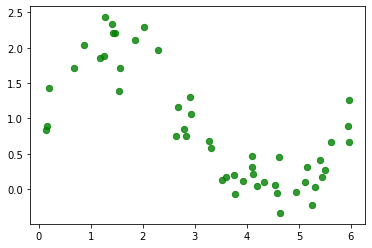

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
# основной график
plt.scatter(data.x_train, data.y_train, 40, 'g', 'o', alpha=0.8)
plt.show()

Обучим полиномиальную регрессию для разных степеней полинома: очень большой, очень маленькой и средней. Для полиномиальной модели порядка $n$ в матрицу фичей $X$ добавляются степени фичей (например, в случае обучения регрессии на единственной фиче модуль приобретёт вид $y = w_0 + w_1x +w_2x^2 + \ldots + w_nx^n$).

Кроме прочей информации будем вычислять *норму вектора весов* $w$ - корень из суммы квадратов коэффициентов линейной регрессии. 

Норма весов рассчитываетсяя

$$
\|w\|^2 = w_1^2+\ldots+w_n^2
$$

Для вычисления этой метрики используем [функцию norm из numpy](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.linalg.norm.html)
* обучаем модель будем на тренировочном сете, а проверять качество модели на валидационном, как мы научились в первом уроке. Чтобы не захламлять график, я буду визуализировать только валидационный сет, а так же сами предсказания модели.

In [61]:
from sklearn.linear_model import LinearRegression
from numpy.linalg import norm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


def generate_degrees(source_data: list, degree: int):
    """Функция, которая принимает на вход одномерный массив, а возвращает n-мерный
    Для каждой степени от 1 до  degree возводим x в эту степень
    """
    return np.array([
          source_data**n for n in range(1, degree + 1)  
    ]).T

def train_polynomial(degree, data):
    """Генерим данные, тренируем модель  
    дополнительно рисуем график
    """
    X = generate_degrees(data['x_train'], degree)
    y = data.y_train.values
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
    model = LinearRegression().fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    y_pred_train = model.predict(X_train)
    error_valid = mean_squared_error(y_valid, y_pred)
    error_train = mean_squared_error(y_train, y_pred_train)
    print(
        "Степень полинома %d\nОшибка на валидации %.3f\nОшибка на обучении %.3f" %
        (degree, error_valid, error_train)
    )
    order_test = np.argsort(X_valid[:,0])
    plt.scatter(X_valid[:,0][order_test], y_valid[order_test], 40, 'r', 'o', alpha=0.8)
    print("Норма вектора весов \t||w|| = %.2f" % (norm(model.coef_)))
    # визуализируем решение
    x_linspace = np.linspace(data['x_train'].min(), data['x_train'].max(), num=100)
    y_linspace = model.predict(generate_degrees(x_linspace, degree))
    plt.plot(x_linspace, y_linspace)
    return error_valid, error_train, norm(model.coef_)

degrees = []
valid_errors = []
train_errors = []
w_norm = []

Давайте проведём эксперимент чтобы узнать, как входные данные влияют на коэффициенты линейной регрессии. Третья степень *degree=3*:

Степень полинома 3
Ошибка на валидации 0.051
Ошибка на обучении 0.077
Норма вектора весов 	||w|| = 2.19


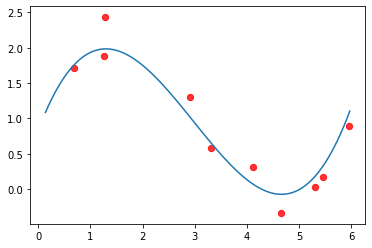

In [62]:
degree = 3

error_valid, error_train, coef_norm = train_polynomial(degree, data)

degrees.append(degree)
valid_errors.append(error_valid)
train_errors.append(error_train)
w_norm.append(coef_norm)

Пятая степень

Степень полинома 5
Ошибка на валидации 0.063
Ошибка на обучении 0.069
Норма вектора весов 	||w|| = 3.31


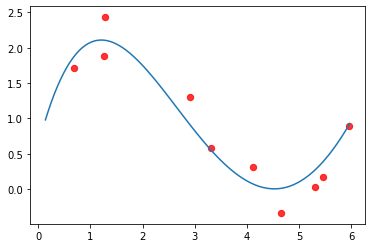

In [63]:
degree = 5

error_valid, error_train, coef_norm = train_polynomial(degree, data)

degrees.append(degree)
valid_errors.append(error_valid)
train_errors.append(error_train)
w_norm.append(coef_norm)

Седьмая степень

Степень полинома 8
Ошибка на валидации 0.119
Ошибка на обучении 0.052
Норма вектора весов 	||w|| = 78.73


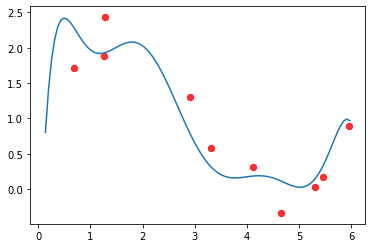

In [64]:
degree = 8

error_valid, error_train, coef_norm = train_polynomial(degree, data)

degrees.append(degree)
valid_errors.append(error_valid)
train_errors.append(error_train)
w_norm.append(coef_norm)

Десятая степень

Степень полинома 10
Ошибка на валидации 0.122
Ошибка на обучении 0.052
Норма вектора весов 	||w|| = 120.14


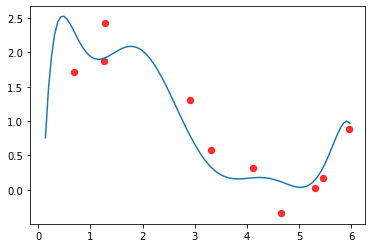

In [65]:
degree = 10

error_valid, error_train, coef_norm = train_polynomial(degree, data)

degrees.append(degree)
valid_errors.append(error_valid)
train_errors.append(error_train)
w_norm.append(coef_norm)

В этом абстрактном эксперименте: видны следующие закономерности

* степень полинома растёт $\rightarrow$ ошибка на тренировочных данных падает
* степень полинома растёт $\rightarrow$ ошибка на валидации растёт
* степень полинома растёт $\rightarrow$ сумма квадратов коэффициентов регрессии растёт

Т.е. можно детектировать переобучение, если проверять такую прокси-метрику как "норма весов регрессии"
* по оси $oX$ - степень полинома
* по оси $oY$ - ошибка на валидации и ошибка на обучении

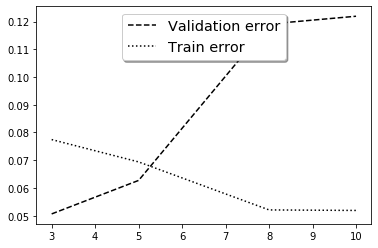

In [66]:
from matplotlib import pyplot
%matplotlib inline

fig, ax = plt.subplots()
ax.plot(degrees, valid_errors, 'k--', label='Validation error')
ax.plot(degrees, train_errors, 'k:', label='Train error')

legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')


plt.show()

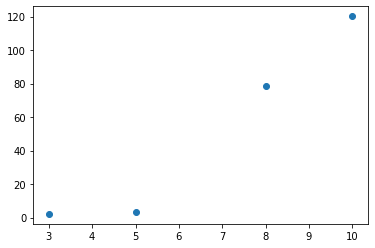

In [67]:
plt.scatter(degrees, w_norm)
plt.show()

На графике можно заметить, как с ростом степень полинома ошибка на валидации начинает расти, а на обучении - наоборот, падать. Одновременно с ухудшением качества модели на валидации можно заметить, как растёт норма вектора коэффициентов $w$ -  от значения $2.19$ до значения $120.14$, то есть большие по модулю величины коэффициентов свидетельствуют о том, что модель переобучается. 

При каком значении степени полинома модель будет получается сбалансированной и не "оверфиттится"? Эта точка - там, где две линии ошибок пересекаются, она соответствует степени полинома *degree=5*: модель достаточно хороша на обучении и не слишком плоха на валидации.

Что такое регуляризация и как она спасает от переобучения? мы получаем предсказания модели, используя коэффициенты регрессии, в виде

$$
\hat{y} = w_0x_0 + \ldots w_nx_n
$$

То есть величина коэффициентов $w$ по модулю сильно влияет на предсказания - чем больше коэффициенты линейной регрессии $w=[w_1,\ldots,w_n]$, тем больше таргет $y$ при одинаковом значении $x$, зависимость линейная.

Вспомним, что аналитическая формула для нахождения коэффициентов регрессии выглядит вот так 
$$
\overline{w} = \left(X^TX\right)^{-1}X^TY
$$

Такое решение получается, когда мы минимизируем функцию ошибок $L$, где $N$ - число обучающих примеров:

$$
L(y,w) = \sum_{i=1}^{N}\left(y_i - \hat{y_i}\right)^2
$$

В эксперименте с полиномиальной регрессией мы выяснили простое правило - чем больше квадраты коэффициентов регрессии, тем хуже качество. Как же нам заставить модель делать коэффициенты поменьше, чтобы качество не страдало?

Самое простое решение, которое приходит на ум - каким-то образом "наказывать" нашу модель за слишком большие значения коэффициентов линейной регрессии $w$. Давайте добавим в функцию качества модели $L(y, w)$ дополнительное слагаемое, которое содержит квадрат нормы вектора весов $\|w\|^2$:

$$
L(y,w) = \sum_{i=1}^{N}\left(y_i - \hat{y_i}\right)^2 + \alpha \cdot \sum_{i=1}^{k}w_i^2 = \sum_{i=1}^{N}\left(y_i - \hat{y_i}\right)^2 + \alpha \cdot \|w\|^2
$$

С помощью этого трюка мы минимизируем функцию $L(x,w)$ как бы в двух направлениях:
* уменьшаем ошибку $y-\hat{y}$ (первый компонент формулы)
* следим за нормой коэффициентов регрессии $\|w\|^2$ - модель вынуждена делать коэффициенты как можно меньшими, потому что их размер влияет на функцию ошибки $L(x,w)$

Эксперимент показал: чем больше $\|w\|^2$, тем сильнее переобучение. **Следовательно, сделав коэффициенты более маленькими, мы уменьшим переобучение**.

Самое простое решение, которое приходит на ум - каким-то образом "наказывать" нашу модель за слишком большие значения коэффициентов линейной регрессии $w$. Давайте добавим в функцию качества модели $L(y, w)$ дополнительное слагаемое, которое содержит квадрат нормы вектора весов $\|w\|^2$:

$$
L(y,w) = \sum_{i=1}^{N}\left(y_i - \hat{y_i}\right)^2 + \alpha \cdot \sum_{i=1}^{k}w_i^2 = \sum_{i=1}^{N}\left(y_i - \hat{y_i}\right)^2 + \alpha \cdot \|w\|^2
$$

С помощью этого трюка мы минимизируем функцию $L(x,w)$ как бы в двух направлениях:
* уменьшаем ошибку $y-\hat{y}$ (первый компонент формулы)
* следим за нормой коэффициентов регрессии $\|w\|^2$ - модель вынуждена делать коэффициенты как можно меньшими, потому что их размер влияет на функцию ошибки $L(x,w)$

Такой процесс добавления слегаемых в целевую функцию называется *регуляризацией*. Регуляризация - это наложение дополнительных ограничений на целевую функцию $L(y, w)$. Добавляя в функцию качества $L$ сумму квадратов коэффициентов регрессии мы "принуждаем" нашу модель к тому, чтобы веса $w=[w_1,\ldots,w_k]$ были как можно более меньшими по модулю. Вернёмся к формуле целевой функции регуляризованной линейной регрессии:
$$
L(y,w) = \sum_{i=1}^{N}\left(y_i - \hat{y_i}\right)^2 + \alpha \cdot \|w\|^2
$$

В этой формуле
* $\alpha$ - параметр регуляризации. Он принимает значения от $0$ до $1$: чем ближе к $1$ - тем сильнее регуляризация, тем сильнее уменьшаются веса линейной регрессии
* квадрат нормы кооэффициентов динейной регрессии: $\|w\|^2 = \sum_{i=1}^{k}w_i^2$

Аналитическое решение новой функции ошибки имеет вид
$$
\overline{w} = \left(X^TX + \alpha E\right)^{-1}X^TY
$$

Обратите внимание, что формула максимально похожа на формулу для вычисления аналитических коэффициентов, с которой мы познакомились в занятии "Линейная регрессия. Часть I":
Вспомним, что аналитическая формула для нахождения коэффициентов регрессии выглядит вот так 
$$
\overline{w} = \left(X^TX\right)^{-1}X^TY
$$
Единственное отличие - внутри скобок добавилось слагаемое $\alpha E$, где E - [единичная матрица](https://ru.wikipedia.org/wiki/Единичная_матрица) размерности $k\times k$ (по количеству коэффициентов линейной регрессии) - единицы стоят только на диагонали.
$$
E = 
\left[
\begin{array}{ccccc}
1 & 0 & \ldots & 0 & 0 \\
0 & 1 & \ldots & 0 & 0 \\
\ldots& \ldots& \ldots& \ldots& \ldots \\
0 & 0 & \ldots & 1 & 0 \\
0 & 0 & \ldots & 0 & 1 \\
\end{array}
\right]
$$

**Задание среднего уровня** Мы использовали реализацию Ridge регрессию из библиотеки sklearn. Для того, чтобы  прокачать навыки программирования и освежить в памяти, как перемножать матрицы в numpy, напишите код для вычисления коэффициентов полиномиальной регрессии (для степени *degree=8*) с регуляризацией по формуле
$$
\overline{w} = \left(X^TX + \lambda E\right)^{-1}X^T\overline{y}
$$

Для примера можно ориентироваться на то, как была реализована аналитическая формула для линейной регрессии в модуле "Линейная регрессия. Часть I"

Единичную матрицу $E$ можно получить с помощью функции https://docs.scipy.org/doc/numpy/reference/generated/numpy.eye.html . Размерность матрицы $k\times k$ (по количеству коэффициентов линейной регрессии). Напоминаю, что количество коэффициентов регрессии совпадает с количеством фичей регрессии, в задании будет $k=8$, т.к. генерим признаки для полинома восьмой степени.

In [ ]:
# -- ВАШ КОД ТУТ --


# -----------------

Мы рассмотрели случай, когда в целевую функцию $L(y,w)$ добавляются квадраты коэффициентов регрессии. Такая модифицикация целевой функции называется $L2$ регуляризацией. 

Следует отметить, что существует также $L1$ регуляризация, когда в целевую функцию $L(y,w)$ добавляются не квадраты весов, а модули весов - этот приём соответствуе метрике *MAE*, с которой вы познакомились в прошлом уроке.

$$
L1(w) = \sum_{i=1}^{N}\left(y_i - \hat{y_i}\right)^2 + \alpha \cdot \sum_{i=1}^{k}|w_i|
$$

$L1$ обладает интересным эффектом - коэффициенты у фичей, которые мало влияют на целевую переменную, становятся равными нулю - то есть такая регуляризация позволяет производить отбор фичей - "выкидываем" из модели фичи, при которых обнулились коэффициенты. В библиотеке sklearn линейная модель с L1-регуляризацией реализована в `sklearn.linear_model.Lasso`

Как выбрать между двумя типами регуляризации?
* если фичей очень много (сотни), среди которых есть потенциально не важные - выбирай *L1*
* фичей мало и все они важны - выбирай *L2* 

Мы познакомимся с регуляризацией $L2$ - такую регуляризацию называют *гребневой*, а реализацию этой модели возмём из `sklearn.linear_model.Ridge`. Натренируем две модели - одну с коэффициентом регуляризации $\alpha=0.01$, а вторую - без регуляризации $\alpha=0.0$:

/www/app/.venv/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.48967e-19): result may not be accurate.
  overwrite_a=True).T
/www/app/.venv/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.23568e-22): result may not be accurate.
  overwrite_a=True).T


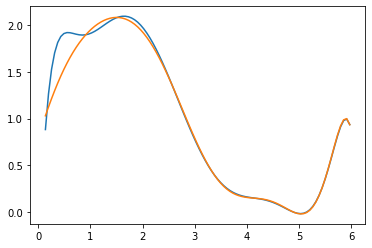

In [15]:
from sklearn.linear_model import Ridge

#plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')

model_ridge = Ridge(alpha=0.01)
model_linear = Ridge(alpha=0.0)
degree = 10

X = generate_degrees(data['x_train'], degree)
y = data['y_train']
# обучаем линейную регрессию с  регуляризацией
model_ridge.fit(X, y)
model_linear.fit(X, y)

x_linspace = np.linspace(data['x_train'].min(), data['x_train'].max(), num=100)

y_linspace_linear = model_linear.predict(generate_degrees(x_linspace, degree))
y_linspace_ridge = model_ridge.predict(generate_degrees(x_linspace, degree))

plt.plot(x_linspace, y_linspace_linear)
plt.plot(x_linspace, y_linspace_ridge)


plt.show()

Готово, модели обучены! мы видим тревожное сообщение **LinAlgWarning: Ill-conditioned matrix (rcond=2.23568e-22): result may not be accurate.** - тут ничего страшного, побороть это сообщение нам поможет знакомство с методом градиентного спуска во следующем уроке этого модуля

Мы видим, что регуляризованная модель более "гладкая", а вот у модели без регуляризации есть перегибы - она выглядит переобученной. Давайте проверим норму коэффициентов регрессии.

In [66]:
print("Норма вектора весов Ridge \t||w|| = %.2f" % (norm(model_ridge.coef_)))
print("Норма вектора весов Linear \t||w|| = %.2f" % (norm(model_linear.coef_)))

Норма вектора весов Ridge 	||w|| = 0.48
Норма вектора весов Linear 	||w|| = 72.97


Мы видим, что регуляризованная модель - более сглаженная, чем нерегуляризованная. Регуляризация позволяет бороться с излишней сложностью модели за счёт наложения дополнительных ограничений на вектор весов модели.

Тем не менее, линия имеет причудливую форму - то есть мы получили довольно гибкую модель. При этом норма вектора коэффициентов линейной регрессии стала небольшой - наша модель не переобучилась.

Как видно, два разных (по норме) набора коэффициентов мы получили при двух разных значениях $\alpha$. Как же выбрать правильное значение коэффициента регуляризации? На помощь приходит процедура, которая называется отложенный контроль, как делали в первом уроке.

Реализуем эту процедуру на языке python. Для у нас есть готовая функция `sklearn.model_selection.train_test_split` :

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, X_test.shape)

(40, 12) (10, 12)


Из 50 точек 40 попало в *train set* и 10 в *validation set* - давайте реализуем остальные шаги алгоритма

In [69]:
alphas = [0.1, 0.15, 0.35 ,0.5,0.8]

best_alpha = alphas[0]
best_rmse = np.infty

for alpha in alphas:
    model_ridge = Ridge(alpha=alpha)
    # обучаем линейную регрессию с  регуляризацией
    model_ridge.fit(X_train, y_train)
    y_pred = model_ridge.predict(X_test)
    error = mean_squared_error(y_test, y_pred)
    if error < best_rmse:
        best_rmse = error
        best_alpha = alpha
    print("alpha =%.2f Ошибка %.5f" % (alpha, error))
print('\n-------\nЛучшая модель aplpha=%.2f с ошибкой RMSE=%.5f\n-------' % (best_alpha, best_rmse))

alpha =0.10 Ошибка 0.04987
alpha =0.15 Ошибка 0.04957
alpha =0.35 Ошибка 0.04848
alpha =0.50 Ошибка 0.04788
alpha =0.80 Ошибка 0.04710

-------
Лучшая модель aplpha=0.80 с ошибкой RMSE=0.04710
-------


/www/app/.venv/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.03858e-21): result may not be accurate.
  overwrite_a=True).T
/www/app/.venv/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.13827e-20): result may not be accurate.
  overwrite_a=True).T
/www/app/.venv/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.2439e-20): result may not be accurate.
  overwrite_a=True).T
/www/app/.venv/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.22891e-20): result may not be accurate.
  overwrite_a=True).T
/www/app/.venv/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.14371e-20): result may not be accurate.
  overwrite_a=True).T


Мы научились делать наши модели намного стабильнее - теперь веса линейной регрессии не увеличиваются с ростом степени полинома, а остаются заключёнными в допустимых пределах. Мы научились уменьшать переобучение с помощью регуляризации модели.

Однако, мы столкнулись с ворненгом **LinAlgWarning** что это за ошибка? Почему она возникает? Как её побороть? На эти вопросы даст ответ градиентный спуск - способ обучения моделей, **не использующий матричное умножение**.

# Обучение моделей с помощью градиентного спуска

Мы помним, что в случае многомерной линейной регрессии (когда количество фичей $m$) аналитическое решение имеет вид
$$
\overline{w} = \left(X^TX\right)^{-1}X^T\overline{y}
$$

Где $X$ - т.н. матрица объекты-признаки размености *количество объектов* x *количество признаков*.

У аналитического решения есть ряд недостатков
* вычислительная сложность из-за матричного перемножения $O(n^3)$, где $n$ - размерность матрицы. При увеличении размерности матрицы в 10 раз сложность вычислений увеличивается в $10^3=1000$ раз
* **неустойчивость вычислений** - пытаемся найти обратную матрицу, которая может не существовать, в этом случае в алгоритме нахождения обратной матрицы возникает деление на ноль

С неустойчивостью вычислений, например, связано предупреждение **LinAlgWarning:** которое мы видели в первом уроке. Пример такой матрицы:
$$
X^TX = 
\left[
\begin{array}{cc}
5 & 25 \\
2 & 10 
\end{array}
\right]
$$

Допустим, хотим вычислить коэффициенты аналитически. Если попытаемся найти обратную матрицу $(X^TX)^{-1}$, мы получим сообщение об ошибке:

In [17]:
import numpy as np
# матрица из примера
X = np.array([[5, 25],[2, 10]])
# пытаемся найти обратную
np.linalg.inv(X)

LinAlgError: Singular matrix

Это очень печально - значит, мы не всегда можем применять аналитическую формулу $\overline{w} = \left(X^TX\right)^{-1}X^T\overline{y}$ для нахождения коэффициентов $\overline{w}$ Как же быть, если задачу решать все равно надо?

Решение этих проблем нашли математики - давайте вычислять коэффициенты линейной регрессии не аналитически, а с помощью приближённых численных методов. Тогда не надо будет перемножать матрицы или находить обратные матрицы. Самый простой и эффективный из этих методов называется методом *градиентного спуска*. Суть метода состоит в обновлении параметров модели $w$ по маленьким шажкам (вместо того, чтобы находить их сразу) - это и есть градиентный спуск.

Каждый такой шажок назвается "итерация".

Мы знаем, что коэффициенты обучаются при помощи минимизации функции ошибок:

$$
L(y,w) = \sum_{i=1}^{N}\left(y_i - \hat{y_i}\right)^2
$$

Эта функция квадратичная - следовательно, имеет форму параболы. Минимум параболы соответствует минимуму ошибки - давайте как-то понемногу "подкручивать" параметры, чтобы по шажкам спуститься в точку, где ошибка будет минимальной - в этой точке и находятся параметры $w$, которые мы ищем. Правила обновления весов должны быть очень простыми и не содержать матричных перемножений

![grad_descent_single_measure](img/grad_descent_single_measure.png)

В трёхмерном случае картинка более красивая - мы движемся как бы ландшафту и хотим найти самую нижнюю точку на этом ландшафте:

![grad_descent_single_measure](img/grad_descent_multi_measure.png)

В в библиотеке sklearn уже есть класс, в котором реализована логика такого путешествия - это класс `sklearn.linear_model.SGDRegressor`. Давайте посмотрим, как он работает на примере нашей выборки из прошлого урока - начнём с загрузки исходных данных

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# для регрессии
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from scipy.spatial import distance
%matplotlib inline

data = pd.read_csv('data/non_linear.csv', sep=',')
data = data[(data.x_train > 1) & (data.x_train < 5)].copy()

X = data['x_train'].values.reshape(-1, 1) # превращаем X из простого массива в вектор-столбец
y = data['y_train'].values

# разбиваем на трейн и валидацию
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)

data.head()

,x_train,y_train
5,1.182421,1.860341
6,1.251605,1.878928
7,1.270474,2.430015
8,1.402553,2.327856
9,1.427711,2.203649


Запустим шажки градиентного спуска (те самые итерации). Для градиентного спуска мы используем готовый класс SGDRegressor: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html . Класс принимает следующие параметры


* `learning_rate='constant'` используем самую простую модификацию спуска из нескольких возможных (см. доументацию)
* `eta0` - шаг градиентного спуска, в формуле мы его обозначали буквой $\alpha$
* `fit_intercept` - чтобы обучить коэффициент при "свободном члене" линейной регрессии (см. "Линейная регрессия. Часть 1")
* `random_state` - этот параметр встречали ранее в этом модуле, он нужен для воспроизводимости вычислений

Функция `partial_fit()`, которую мы вызываем в коде, делает одну итерацию градиентного спуска.

По оси $oX$ отложим количество итераций, а по оси $oY$ - значение метрики качества *MSE*, которое получили на  валидации

Итарации остановлены на шаге 208


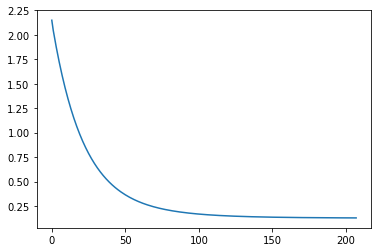

In [19]:
sgd_regressor = SGDRegressor(learning_rate='constant', eta0=0.009, fit_intercept=True, random_state=42)
w_current, epsilon = np.random.random(2), 0.0001
weight_evolution, rmse_evolution = [], [] # изменения весов и ошибка на валидации
for step in list(range(800)):
    sgd_regressor = sgd_regressor.partial_fit(X_train, y_train)
    weight_evolution.append(distance.euclidean(w_current, sgd_regressor.coef_))
    if weight_evolution[-1]<epsilon:
        print("Итарации остановлены на шаге %d" % step); break
    rmse_evolution.append(mean_squared_error(y_valid, sgd_regressor.predict(X_valid)))
    w_current = sgd_regressor.coef_.copy()
plt.plot(range(step), rmse_evolution)

**Практическое задание** очевидно, что чем больше шаг градиентного спуска (параметр *eta0* класса *SGDRegressor*), тем быстрее мы придём к оптимальным значениям. Используя под выше, поиграйтесь с параметром *eta0* и добейтесь , чтобы градиентный спуск закончился быстрее, чем за 200 шагов.

Сколько шагов у вас получилось? Какое качество *RMSE* у Вашего решения?

In [ ]:
# -- ВАШ КОД ТУТ --



# ----------------

Визуализируем решение на графике

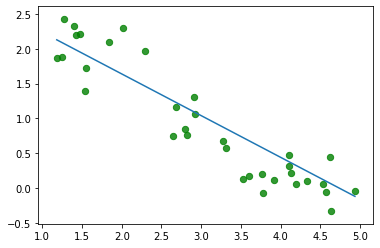

In [20]:
x_linspace = np.linspace(data['x_train'].min(), data['x_train'].max(), num=100)

y_linspace= sgd_regressor.predict(x_linspace.reshape(-1,1))

plt.plot(x_linspace, y_linspace)
plt.scatter(data.x_train, data.y_train, 40, 'g', 'o', alpha=0.8, label='data')

plt.show()

Готово! Мы получили решение задачи линейной регрессии, обучив параметры линейной регресии небольшими "шажками". Мы не использовали сложных матричных вычислений - тем не менее получили линию регрессии, которая лежит в середине облака точек. Когда стоит использовать градиентный спуск в реальных задачах?

* когда данных очень много - в этом случае компьютер может не справится с перемножением матриц
* когда нужно контролировать точность обучения - остановить итерации можно в любой момент (не дожидаясь, пока дойдем до "идеальных" значений.

Когда не стоит применять градиентный спуск? Когда данных мало - в этом случае лучше воспользоваться классами *Ridge* и *Lasso*.

В домашней работе нужно будет применить SGD на многомернх данных

# Реализация SGD на python

"Маленькие шажки", которыми мы двигаемся к оптимальному решению в виде формулы выглядят следующим образом:
$$
w^{k+1} = w^k - \eta\nabla L(w)
$$
Переменная $\eta$ в формуле - т.н. *шаг градиентного спуска*.

Где $\nabla L(w)$ - вектор градиента функции. Этот вектор обладает следующими свойствами: 

* имеет размерность вектора параметров. Если два параметра $[w_1,w_0]$ - в векторе будет два элемента
* элемент градиента под номером $i$ - это частная производная (вспоминаем математику за 11 класс и [смотрим в Википедию](https://ru.wikipedia.org/wiki/Производная_функции ) ) функции потерь $L(y, w)$ по параметру $w_i$

Вектор антиградиента всегда направлен в сторону уменьшения функции - в этом и есть всё волшебство! Мы будем двигаться в сторону минимума функции ошибки, потому что знаем как туда попасть - надо следовать по антиградиенту.

На картинке одномерный случай. Синяя стрелка - градиент, красная - антиградиент. Видно, что если двигаться по вектору антиградиента, то свалимся в минимум функции за конечное число шагов
![grad_vector](img/grad_vector.png)

Алгоритм визуально выглядит довольно интуитивно - (1) у тебя есть вектор-стрелочка (2) шагай по стрелочке, пока не попадёшь на дно "оврага", который представляет собой целевую функцию . В трёхмерном случае оптимальное значение функции находится в центре концентрицеских эллипсов (эллипс - проекция трёхмерной фигуры функции потерь на плоскость):

![grad_descent](img/grad_descent_intuit.png)

Как туда добраться, двигаясь маленькими шажками?

1. Стартуем алгоритм в случайной начальной точке $x^0$  
1. Вычисляем направление антиградиента $-f'(x^0)$ (буквально: производная со знаком "минус")
1. Перемещаемся по направлению градиента в точку $x^1 = x^0 - \eta f'(x^0)$
1. Повторяем шаги (1-3) для попадания в точку $x^2$
1. $\ldots$
1. Profit! Достигли оптимальной точки $x^*$

Алгоритм выше - универсальный, он позволяет найти точку минимума любой функции $f(x)$. А как же нам найти минимум функции качества линейной регрессии $L$?

Чтобы реализовать алгоритм градиентного спуска, выпишем частные прозводные функции качества линейной регрессии $L$ для параметров $\overline{w} = [w_1,\ldots,w_m]$ в простейшем случае $n=1$, то есть для одного обучающего примера (одного наблюдения):
$$
\left\{
\begin{array}{cc}
\frac{\partial L}{\partial w_0} = 2\cdot(-1)\cdot1\cdot (y_1 - (w_0x_0^1 + \ldots+w_mx_m^1)) &\\
\frac{\partial L}{\partial w_k} = 2\cdot(-1)\cdot x_1^1 \cdot (y_1 - (w_0x_0^1 + \ldots+w_mx_m^1)) &  k\neq 0\\
\end{array}
\right.
$$

В формуле все обозначения вам известны

* $w_0, \ldots, w_m$ - коэффициенты линейной регрессиии $m$ - количество фичей
* $x_0, \ldots, x_m$ - фичи.

Эту формулу с частными производными можно легко обобщить на случай, когда в обучающей выборке не один объект, а $n$ - просто добавляем сумму по всем объектам от 1 до $n$:
$$
\left\{
\begin{array}{cc}
\frac{\partial L}{\partial w_0} = \frac{2}{n}\cdot(-1)\cdot \sum_{i=1}^{n} 1\cdot \left(y_i - \sum_{j=1}^{m}w_jx_j^i\right) &\\
\frac{\partial L}{\partial w_k} = \frac{2}{n}\cdot(-1)\cdot \sum_{i=1}^{n} x_k^i \cdot\left(y_i - \sum_{j=1}^{m}w_jx_j^i\right) & k\neq 0 \\
\end{array}
\right.
$$

Что значат переменные в этой формуле?
* $n$ - число точек в обучающей выборке
* $m$ - число фичей в датасете
* $k$ - номер коэффициента в списке параметров линейной регрессии $w = [w_0,\ldots,w_m]$
* $y_i$ - значение целевой переменной на объекте обучающей выборки под номером $i$
* $x_j^i$ - значение фичи под номером $j$ на объекте обучающей выборки под номером $i$


Алгоритм градиентного спуска следующий:

1. Вычислить градиент $\nabla L(w)$
1. Вычислить новый вектор  $w^{k+1} = w^k - \eta\nabla L(w)$
1. Повторять пункты до тех пор, пока $w^{k+1}$ и $w^{k}$ не сойдутся вместе, то есть вектор весов перестанет обновляться

Чтобы лучше понять этот метод, давайте реализуем его "с нуля" на языке Python

Загружаем датасет из приложенного csv

In [70]:
import numpy as np
import pandas as pd

data = pd.read_csv('data/non_linear.csv', sep=',')
data = data[(data.x_train > 1) & (data.x_train < 5)].copy()
data.head()

,x_train,y_train
5,1.182421,1.860341
6,1.251605,1.878928
7,1.270474,2.430015
8,1.402553,2.327856
9,1.427711,2.203649


Отображаем точки на графике

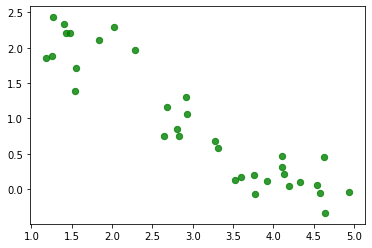

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

# основной график
plt.scatter(data.x_train, data.y_train, 40, 'g', 'o', alpha=0.8, label='data')
plt.show()

Реализуем метод градиентного спуска:

Вычисляем градиент

In [72]:
from scipy.spatial import distance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def gradient(X, y, w, alpha=0) -> np.array:
    # количество обучающих примеров в выборке
    n = X.shape[0]
    # считаем прогноз
    y_hat = X.dot(w.T)
    # вычисляем ошибку прогноза
    error = y - y_hat
    # дальше pointwise перемножение - умножаем каждую из координат на ошибку
    pointwise_errors = np.multiply(X, error) + X
    # print(pointwise_errors.shape, X.shape, error.shape)
    grad = pointwise_errors.sum(axis=0)*(-1.0)*2.0 / n
    return grad, error

Делаем шаг градиентного спуска

In [73]:
def eval_w_next(X, y, eta, w_current):
    # вычисляем градиент
    grad, error = gradient(X, y, w_current)
    # делаем шаг градиентного спуска
    w_next = w_current - eta*grad
    # проверяем условие сходимости
    weight_evolution = distance.euclidean(w_current, w_next)
    return (w_next, weight_evolution, grad)

Повторяем шаги (1,2) до сходимости

In [74]:
def gradient_descent(X: np.array, y: np.array, eta=0.01, epsilon=0.001) -> np.array:
    m = X.shape[1] # количество фичей
    # инициализируем рандомом веса
    w = np.random.random(m).reshape(1, -1)
    w_next, weight_evolution, grad = eval_w_next(X, y, eta, w)
    step = 0
    # повторяем до сходимости вектора весов
    while weight_evolution > epsilon:
        w = w_next
        w_next, weight_evolution, grad = eval_w_next(X, y, eta, w)
        step += 1
        if step % 100 ==0:
            print("step %s |w-w_next|=%.5f, grad=%s" % (step, weight_evolution, grad))
    return w

Запускаем обучение

In [75]:
# трансформируем плоский массив X в вектор-столбец
X = data['x_train'].values.reshape(-1, 1)
n = X.shape[0]
# добавляем тривиальный признак w_0, столбец из единиц. См. прошлый урок, почему так
X = np.hstack([
    np.ones(n).reshape(-1,1),
    X
])
w = gradient_descent(X, data['y_train'].values.reshape(-1, 1), eta=0.008)

step 100 |w-w_next|=0.00570, grad=[-0.68411828  0.19762816]
step 200 |w-w_next|=0.00469, grad=[-0.56297859  0.16263332]
step 300 |w-w_next|=0.00386, grad=[-0.46328961  0.13383515]
step 400 |w-w_next|=0.00317, grad=[-0.38125297  0.1101364 ]
step 500 |w-w_next|=0.00261, grad=[-0.31374291  0.09063409]
step 600 |w-w_next|=0.00215, grad=[-0.25818714  0.07458513]
step 700 |w-w_next|=0.00177, grad=[-0.21246886  0.06137803]
step 800 |w-w_next|=0.00146, grad=[-0.17484611  0.05050956]
step 900 |w-w_next|=0.00120, grad=[-0.14388537  0.04156562]


У нас произошло несколько сотен итераций, на каждой итерации мы:
* вычисляем вектор весов
* смотрим расстояние между новым вектором весов и векторов весов с предыдущего шага
* если изменения в векторе весов небольшие (скажем, четвёртый знак поcле запятой) - останавливаем итерации

Когда вектор перестаёт меняться - говорят, что алгоритм "сошёлся" (имеется в виду сходимость к оптимальной точке) - это значит, что итерации можно останавливать.

Применяем модель

In [76]:
support = np.linspace(X.min(), X.max(), num=100)
# делаем предикт - считаем предсказания модели в каждой точке обучающей выборке в виде y=X*w
y_hat = np.hstack([
    np.ones(support.size).reshape(-1, 1),
    support.reshape(-1, 1)
]).dot(w.T)

Визуализируем результаты

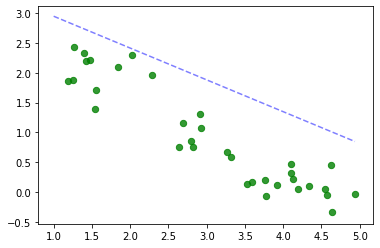

In [77]:
# строим график
plt.plot(support, y_hat, 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')
plt.show()

**Особенности градиентного спуска**

1. Нужно подбирать параметр $\eta$. Еcли выбрать параметр слишком малым, то обучение регрессии будет происходить слишком медленно. Если слишком большим - вычисления не сойдутся к оптимуму. Вариант решения - адаптивный выбор величины шага
1. Долгие вычисления, если размер выборки $n$ становится большим. В этом случае мы можем вычислять градиент не по всей выборке за один шаг, а по одному случайному элементу выборки - в этом случае вычислений значительно меньше.

Кроме того, градиент можно считать не только по одному объекту, но и по случайной подвыборке (батчу). Такая модификация алгоритма называется градиентным спуском по мини-батчам.


Хорошая теория [тут](http://www.machinelearning.ru/wiki/images/6/68/voron-ML-Lin.pdf). Неплохая статья с разбором [формул обновления весов](https://medium.com/@lachlanmiller_52885/machine-learning-week-1-cost-function-gradient-descent-and-univariate-linear-regression-8f5fe69815fd). Видео от [специализации ШАД на coursera](https://ru.coursera.org/lecture/supervised-learning/gradiientnyi-spusk-dlia-linieinoi-rieghriessii-adARX)

В домашке нужно будет написать свою реализацию SGD

# Селекция моделей

Мы узнали про достаточное количество алгоритмов машинного обучения и про то, как оценивать качество алгоритмов

Следующий шаг - научиться настраивать алгоритмы для получения максимального качества


## Feature engeneering

В задачи unsupervised и supervised объединяет общий элемент - матрица *объекты* $\times$ *признаки* размерность $m \times n$, где $m$ - число объектов, а $n$ - число признаков

$$
X = \left[
\begin{array}{cccc}
x_{11} & x_{12} & \ldots & x_{14} \\
x_{21} & x_{22} & \ldots & x_{14} \\
\ldots & \ldots & \ldots & \ldots \\
x_{m1} & x_{m2} & \ldots & x_{mn} \\
\end{array}
\right]
$$

Таким образом, каждый объект описан признаками(фичами) в количестве $n$ штук: $x^i = (x_1, x_2, \ldots, , x_n)$. Мы уже знаем, что фичи бывают численными и категориальными.

Фичи можно назвать "топливом" алгоритмов машинного обучения. Хорошие фичи позволят повысить качество решения задачи, примерно как на картинке

![ml_blackbox](img/ml_blackbox.png)


В алгоритмах машинного обучения и анализа данных часто встречаются требования к фичам входных данных
* распределение данных
* масштаб

Перед аналитиком часто стоит задача трансформации (преобразования) входных данных таким образом, чтобы удовлетворить условиям алгоритма. Игнорирование требований к входным данным приводит некорректным выводам, это омновной принцип ML (и не только ML): **garbage in - garbage out**. Процесс "придумывания" фичей называется feature engineering

В этом занятии поговорим о том, как трансформировать исходный csv файл в набор фичей

### Непрерывные фичи

В задачах линейной регрессии такие трансформации особенно важны - чтобы линейная регрессия хорошо работала должны выполняться следующие требования:

* остатки регрессии должны иметь нормальное (гауссово) распределение
* все фичи должны быть примерно в одном масшабе

При подготовке данных для обучения линейной регрессии применяются следющие приемы: масштабирование и нормализация.

#### Монотонные преобразования

Существуют чисто инженерные приёмы первичной обработки данных, например для борьбы с большими по модулю значениями обычно используют

* логарифмирование np.log
* извлечение квадратного корня np.sqrt

Оба этих преобразования являются *монотонными*, т.е. они меняют абсолютные значения, но сохраняют порядок величин.

#### z-score

Более интересный метод - это Standart Scaling или Z-score normalization. Это преобразование позволяет "сгладить" данные, избавить их от выбросов. Для этого есть инструмента [есть реализация в sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)


In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.stats import shapiro

data = pd.read_csv('data/task.csv')
print(data.head(3))

raw_data = data[data.columns.values[-1]].values.astype(np.float32)
print("Сырой датасет: %s" % raw_data)
print("stat = %s, p-value=%s\n" % shapiro(raw_data) )

transformed_data = StandardScaler().fit_transform(raw_data.reshape(-1, 1)).reshape(-1)
print("z-transform датасет: %s" % transformed_data)
print("stat = %s, p-value=%s\n" % shapiro(transformed_data) )

print("Проверка на нормальность p_1 > p_2: %s" % (shapiro(transformed_data)[1] > shapiro(raw_data)[1]))

         Код                                               Тема  \
0  HYDRA-535  Пробрасывать пользовательское распределение pa...   
1  HYDRA-534   Гибридный рекомендатель с multi-channel feedback   
2  HYDRA-532         Джоба в дженкинсе для расчёта динамики РВП   

       Компонент  Затрачено в часах  
0        echidna                  1  
1          hydra                  3  
2  hydramatrices                  2  
Сырой датасет: [ 1.  3.  2.  4.  2. 10.  2.  5.  2.  2.  1.  7.  5.  2.  5. 16. 10.  3.
 24.]
stat = 0.7262855768203735, p-value=0.00011633868416538462

z-transform датасет: [-0.79860216 -0.4497874  -0.6241948  -0.27538007 -0.6241948   0.7710641
 -0.6241948  -0.10097268 -0.6241948  -0.6241948  -0.79860216  0.24784204
 -0.10097268 -0.6241948  -0.10097268  1.8175083   0.7710641  -0.4497874
  3.2127674 ]
stat = 0.7262856960296631, p-value=0.00011633900430751964

Проверка на нормальность p_1 > p_2: True


Тест Шапиро-Уилка показывает, что гипотеза о нормальном распределении данных стала чуть более вероятной, чем до "Z-score" нормализации.

### min-max normalization

Другой распространённый метод называется MinMax Scaling. Этот метод переносит все точки на отрезок [0-1]
$$
X_{scaled} = \frac{X - X_{\min}}{X_{\max} - X_{\min}}
$$

In [3]:
from sklearn.preprocessing import MinMaxScaler


print("Сырой датасет: %s" % raw_data)

transformed_data = MinMaxScaler().fit_transform(raw_data.reshape(-1, 1)).reshape(-1)

print("Min-Max scale датасет: %s" % transformed_data)

Сырой датасет: [ 1.  3.  2.  4.  2. 10.  2.  5.  2.  2.  1.  7.  5.  2.  5. 16. 10.  3.
 24.]
Min-Max scale датасет: [0.         0.08695652 0.04347826 0.13043478 0.04347826 0.39130437
 0.04347826 0.17391305 0.04347826 0.04347826 0.         0.2608696
 0.17391305 0.04347826 0.17391305 0.65217394 0.39130437 0.08695652
 1.        ]



## Категориальные фичи

Категориальная переменная - это набор меток (классов). В приложенном затасете по задам столбец `Компонент` - категориальная фича, а `Затрачено в часах` - непрерывная


In [78]:
import pandas as pd

df = pd.read_csv('data/task.csv')

df.head()

,Код,Тема,Компонент,Затрачено в часах
0,HYDRA-535,Пробрасывать пользовательское распределение pa...,echidna,1
1,HYDRA-534,Гибридный рекомендатель с multi-channel feedback,hydra,3
2,HYDRA-532,Джоба в дженкинсе для расчёта динамики РВП,hydramatrices,2
3,HYDRA-531,Интеграция Hydra с Gamora,hydramatrices,4
4,HYDRA-530,Тестируем интеграцию с Jira,hydra,2


Посчитаем количество различных меток в поле "Компонент"

In [79]:
df['Компонент'].value_counts()

hydra            11
hydramatrices     6
hydra_utils       1
echidna           1
Name: Компонент, dtype: int64

### Кодирование One-Hot

Кодируем вектор, где все нули и одна единица

In [80]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore')

one_hot_encoded = ohe.fit_transform(df[['Компонент']])

one_hot_encoded.toarray()

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

### Hashing trick

В случае, когда признаков слишком много, применяют хеширование



In [81]:
for label in df['Компонент'].unique():
    #print(label, '->', hash(label) % 8 )
    print(label, '->', hash(label) % 12 )

echidna -> 4
hydra -> 8
hydramatrices -> 5
hydra_utils -> 8


Премер хеширования (с формулами!) в [Лекциях от ВШЭ](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture06-linclass.pdf)

Прекрасный разбор есть на хабре в статье от [ODS про feature engineering](https://habr.com/ru/company/ods/blog/326418/#rabota-s-kategorialnymi-priznakami-label-encoding-one-hot-encoding-hashing-trick)

## Как извлекать фичи: тексты


Bpdktrкак обработка естественного языка (англ. Natural Language Processing, NLP). NLP изучает проблемы компьютерного анализа естественных языков - т.е. языков, которые для общения используют люди (а не придуманных искусственно (например, азбука Морзе - язык, придуманный искусственно). Поговорим подробнее о том, зачем нужен NLP и где именно возникает задача обработки естественного языка.

Тексты - один из самых доступных и объёмных источников данных: легко собирать и просто хранить

Например, если у вас интернет-магазин, то для анализа доступны

* текстовые описания товаров
* пользовательские комментарии
* диалоги с продавцом-консультантом в чатике

Текстовую информацию просто хранить, поэтому проекты накапливают огромные наборы данных такого рода и очень хотят извлекать из этих объёмов полезную информацию.

Как специалист по ML в начале карьеры вы, скорее всего, встретите ряд “классических” задач - например, определение тональности (настроения) текста или классификации сообщений spam/not spam - для таких задач используются подходы, основанные на подсчёте статистик по встречающимся в тексте словам.
Однако, есть и другие, более сложные задачи. 

Для решения применяются различные архитектуры нейросетей (RNN, LSTM) - это мощные инструменты, которые позволяют решать сложные задачи, например: 

* извлечения именованных сущностей ([NER](https://habr.com/ru/post/414175/), Named-Entity Recognizing)
* автоматизированного перевода (например, сервис *google translate* производит перевод с помощью глубоких сетей)
* Speech Recognition - распознавание речи, трансляция из аудио в текстовый вид
* Natural Language Generation - генерация текстов, например можно генерировать подписи к картинкам

У обработки естественного языка есть ряд особенностей:

* необходимо размечать большой объём данных для обучения с учителем. Допустим, хотим отделять спам-сообщения от не спама. Вам нужно найти людей, которые прочитают все смс, которые удалось собрать и отметят те из них, которые являются спамом - текстов обычно очень много и разметка данных может оказаться дорогим удовольствием
* модель, обученную на одном языке невозможно использовать для другого языка
* важен как синтаксис, так и семантика (смысл). Например, во фразе: «Вот списки студентов, которые сдали зачет по физике» определение «которые сдали зачет по физике» относится к студентам, а в предложении: «Вот списки студентов, которые лежали в шкафу у декана»  структура фразы (тот самый синтаксис) такая же, как и предыдущей - но определение уже относится не к студентам, а к листкам бумаги. От компьютера мы хотим добиться, чтобы смыл обеих фраз был “понят” одинаково хорошо.

Кроме того, для текстов на естественном языке довольно сложно проводить предобработку данных, этот этап сильно зависит от задачи, которую вы  решаете. Так, например, для задачи анализа тональности текста знаки препинания, скорее всего, не важны. Однако, для задачи извлечения именованных сущностей (именованная сущность - это имя собственное - например название организации или географического объекта) удалять знаки препинания не рекомендуется - это может привести к потере важной информации. Например если из фразы `Мы пошли обедать в “Берёзку”` если удалить все знаки препинания (кавычки) и заглавную букву в названии заведения то станет сложнее понять, что речь идёт о кафе.

Обработка текста складывается из двух этапов

* предварительная обработка текста
* векторизация текста

#### Предварительная обработка текста

Перед тем, как обучать модель, данные следует специальным образом подготовить. Подготовка данных включает в себя несколько обязательных этапов

* удалить все нерелевантные символы (например, любые символы, не относящиеся к цифро-буквенным).
* токенизировать текст, разделив его на индивидуальные слова (токены)
* удалить нерелевантные слова — например, упоминания в Twitter или URL-ы.
* перевести все символы в нижний регистр для того, чтобы слова «hello», «Hello» и «HELLO» были схлопнуты в один токен
* исправление ошибок ("молоко" и "молако" - одно слово, но разные токены, не надо так)  
* лемматизация - перевод слова в нормальную (словарную) форму (например, «машина» вместо «машиной»). Существительные должны быть приведены к единственному числу именительного падежа, глаголы - инфинитив и т.д.
* стемминг - процедура, когда от слова переходим к его корню ("помыть" и "мытый" - корень "мыт"). То есть все "помытые" заменяем на "мыт".

Все эти приёмы нужно применять с осторожностью и внимательно следить за тем, как тот или иной приём, применённый к исходному тексту, влияет на качество решения задачи (например, выявлению спама)

Для демонстрации всех этих приёмов загрузим корпус (набор текстов) с твитами о продуктах. Для каждого твита размечена эмоциональная окраска - позитивная, нейтральная или негативная. Примечание: для  обработки текста воспользуемся библиотекой nltk, которая [доступна в anaconda](https://anaconda.org/anaconda/nltk)

In [91]:
import nltk
import string
import pandas as pd

# дополнительный словарь со знаками пунктуации
nltk.download('punkt', download_dir='.')

df = pd.read_csv('data/brand_tweets.csv', sep=',', encoding='utf8')
# удаляем строки, в которых отсутствует текст твита
df.drop(df[df.tweet_text.isnull()].index, inplace=True)
print(df.shape)

df.head()

(3904, 3)


[nltk_data] Downloading package punkt to ....
[nltk_data]   Package punkt is already up-to-date!


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


Для начала разделим текст на отдельные слова с помощью библиотечной функции word_tokenize, на примере первого документа в корпусе

In [92]:
sample_str = df.tweet_text.values[0]

print('== Исходный текст== \n%s\n\n' % sample_str)

tokenized_str = nltk.word_tokenize(sample_str)
print('== Токенизированный текст==\n%s' % tokenized_str)

== Исходный текст== 
.@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.


== Токенизированный текст==
['.', '@', 'wesley83', 'I', 'have', 'a', '3G', 'iPhone', '.', 'After', '3', 'hrs', 'tweeting', 'at', '#', 'RISE_Austin', ',', 'it', 'was', 'dead', '!', 'I', 'need', 'to', 'upgrade', '.', 'Plugin', 'stations', 'at', '#', 'SXSW', '.']


Отфильтруем знаки пунктуации, токены приведём к нижнему регистру

In [93]:
tokens = [i.lower() for i in tokenized_str if ( i not in string.punctuation )]
print(tokens)

['wesley83', 'i', 'have', 'a', '3g', 'iphone', 'after', '3', 'hrs', 'tweeting', 'at', 'rise_austin', 'it', 'was', 'dead', 'i', 'need', 'to', 'upgrade', 'plugin', 'stations', 'at', 'sxsw']


Удаляем стоп-слова, список которых для русского языка можно получить как `stop_words = nltk.corpus.stopwords.words('russian')`. Стоп-слова это "мусорные" слова которые встречаются чрезычайно часто (в каждом предложении) поэтому не несут в себе никакой информации. Такие слова, вобщем-то, нужны только для красивой речи и поэтому можем их смело удалять из текста. Например, этот список стоп-слов я нагуглил в интернете.

In [94]:
stop_words = [
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd",
    'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers',
    'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which',
    'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been',
    'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if',
    'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between',
    'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out',
    'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why',
    'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not',
    'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'shold',
    "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't",
    'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't",
    'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't",
    'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"
]

filtered_tokens = [i for i in tokens if ( i not in stop_words )]

print(filtered_tokens)

['wesley83', '3g', 'iphone', '3', 'hrs', 'tweeting', 'rise_austin', 'dead', 'need', 'upgrade', 'plugin', 'stations', 'sxsw']


#### Домашнее задание

Реализуем пайплайн в виде функции, при помощи которой обработаем все текстовые описания. Для каждого описания
* проводим токенизацию
* удаляем пунктуацию
* приводим к нижнему регистру
* удаляем стоп-слова


Примените процедуру токенизации к файлу brand_tweets_valid.csv

Сколько уникальных токенов получилось?

In [96]:
def tokenize_text(raw_text: str):
    """Функция для токенизации текста
    
    :param raw_text: исходная текстовая строка
    """
    filtered_tokens = []
    # -- ВАШ КОД ТУТ --
    
    filtered_tokens = [i.lower() for i in raw_text.split() if ( i not in string.punctuation )]
    
    # -----------------
    return filtered_tokens

# применяем функцию в датафрейму с помощью метода .apply()
tokenized_tweets= df.tweet_text.apply(tokenize_text)

# добавляем новую колонку в исходный датафрейм
df = df.assign(
    tokenized=tokenized_tweets
)

df.tokenized.head()

0    [.@wesley83, i, have, a, 3g, iphone., after, 3...
1    [@jessedee, know, about, @fludapp, awesome, ip...
2    [@swonderlin, can, not, wait, for, #ipad, 2, a...
3    [@sxsw, i, hope, this, year's, festival, isn't...
4    [@sxtxstate, great, stuff, on, fri, #sxsw:, ma...
Name: tokenized, dtype: object

Следующий шаг - привести слово в нормальную (словарную) форму. Для русского языка мы уже проводить нормализацию можно с помощью модуля pyMorphy, который отлично подходит для русского языка

<pre>
import pymorphy2

morph = pymorphy2.MorphAnalyzer()
parsed_token = morph.parse(word)
normal_form = parsed_token[0].normal_form
</pre>

В силу того, что наши твиты на английском языке, то этап нормализации не слишком актуален.



### Векторизация текста: Bag of Words


Мы умеем подготавливать текст к обработке: приводить слова к начальным формам, разделять текст на токены, удалять "мусорные" токены (стоп-слова). Однако, мы знаем, что нейросети работают не с текстом, а с числами. Давайте разбираться, как переводить токены в числа, то есть с тем, как работает векторизация

Bag of Words - это способ перейти от набора токенов к численному вектору. Алгоритм векторизации текста по модели BoW:

1. определяем количество $N$ различных токенов во всех доступных текста - так называемый "словарь"
1. присваиваем каждому токену случайный номер от $0$ до $N$
1. для каждого документа $i$ формируем вектор размерности $N$ - ставим на позицию $j$ количество вхождений токена с номером $j$, которые содержатся в тексте $i$.

Каждый токен мы по сути представляем в виде вектора размерности $N$, который состоит из нулей и всего одной единицы, такое кодирование называется *One-Hot encoding*. А каждый документ это "сумма" всех one-hot векторов входящих в него токенов

Такой подход хорошо иллюстрируется картинкой:

![bow](img/bow.png)

Для каждого элемента получаем вектор из нулей и единиц. При этом размерность словаря обычно составляет несколько десятков тысяч, а количество токенов в одном документе несколько десятков - то есть нулей значительно больше, чем единиц - такие данные называются *разреженными*.

В таком виде данные уже пригодны для работы с нейросетью или любым другим алгоритмом ML, однако есть несколько довольно простых и полезных вещей, которые мы можем сделать и без нейросетей. Давайте сначала разберем их, а потом вернемся к нейросетям. Такое представление текста позволяет решать интересные задачи - например, находить самые похожие друг на друга тексты. Чтобы как-то формализовать понятие "схожести" текстов, вводится понятие *косинусного расстояния* между двумя векторами текстов $a$ и $b$ размерности $N$. С этой метрикой вы [можете познакомиться в Википедии](https://ru.wikipedia.org/wiki/Векторная_модель#Косинусное_сходство ), формула такая для двух векторов $a$ и $b$ с координатами $a_i$ и $b_i$ соответственно:
$$
\text{similarity} = \cos (\theta) = 1 - \frac{\sum_{i=1}^{N}a_ib_i}{\sqrt{\sum_{i=1}^{N}(a_i)^2}\sqrt{\sum_{i=1}^{N}(b_i)^2}}
$$

Интуитивное объяснение для простого случая: два документа полностью совпадают, тогда единички в них стоят на одних и тех же местах - расстояние между ними будет нулевым. Если два текста совершенно не пересекаются, то единички будут стоять на разных местах - расстояние в этом случае равно единице. Самостоятельно реализовывать функцию не нужно - есть готовая реализация в [scipy.spatial.distance.cosine](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.spatial.distance.cosine.html)

Векторизуем наш корпус (набор текстов) с помощью класса `CountVectorizer()` (то есть превращаем наборы токенов в наборы векторов)

In [97]:
from sklearn.feature_extraction.text import CountVectorizer

# инициализируем объект, который токенизирует наш текст
# в качестве единственного аргимента передаём функцию, которую мы написали в Уроке 2
# на разбивает каждый документ на токены
vectorizer = CountVectorizer(tokenizer=tokenize_text)
# применяем наш объект-токенизатор к датафрейму с твитами
document_matrix = vectorizer.fit_transform(df.tweet_text.values)
# результат - матрица, в которой находятся числа, строк в мастрице столько, сколько документов
# а столбцов столько, сколько токенов
document_matrix

<3904x10795 sparse matrix of type '<class 'numpy.int64'>'
	with 64190 stored elements in Compressed Sparse Row format>

Класс `sklearn.feature_extraction.text.CountVectorizer` реализует алгоритм преобразования массива текстовых документов в разреженную матрицу такую, что

* число строк совпадает с количеством документов в исходном датафрейме
* количество столбцов совпадает с количеством различных токенов
* объект `CountVectorizer()` содержит в себе разные вспомогательные элементы - например, словарь соответствия токена и его номера

Полученные вектора можно использовать в алгоритмах второго уровня - например, в задаче классификации отзывов.

Пользуясь матрицей, найдем твит, который максимально похож на первый твит из набора:

In [98]:
source_tweet_index = 0
print(df.iloc[source_tweet_index].tweet_text)

.@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.


Вычисляем попарные схожести между элементами разреженной матрицы

In [99]:
from sklearn.metrics import pairwise_distances

tweet_distance = 1-pairwise_distances(document_matrix, metric="cosine")

tweet_distance.shape

(3904, 3904)

Мы получили квадратную матрицy, которая содержит столько строк и столбцов, сколько документов в нашем  корпусе  (наборе текстов).

In [100]:
import numpy as np

# отсортируем твиты по “похожести” - чем похожее на source_tweet_index,
# тем ближе к началу списка sorted_similarity
sorted_similarity = np.argsort(-tweet_distance[source_tweet_index,:])

sorted_similarity

array([   0,  633, 3562, ..., 3115, 3121, 2003])

Мы получили вектор "схожестей", который содержит индексы похожих твитов, расположенных по убыванию схожести. Больше всего твит похож сам на себя, поэтому возьмём индекс второго по схожести элемента (и далее).

In [101]:
print(df.iloc[0].tweet_text)
print('-------------')
print(df.iloc[sorted_similarity[1]].tweet_text)
print('-------------')
print(df.iloc[sorted_similarity[2]].tweet_text)
print('-------------')
print(df.iloc[sorted_similarity[3]].tweet_text)

.@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.
-------------
.@mention I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.
-------------
@mention I think I got it because I bought something at apple - and it assumes that I'm at the apple popup store at #sxsw
-------------
If I were at #SXSW I could spend it all at the @mention Teaching Theater alone; just look at that schedule: {link}


Мы получили мощный инструмент для анализа текстов - например, мы случайно нашли дубликат твита

Кроме простого подхода, когда мы вычисляем счётчик вхождения токена, можно вычислять более сложную метрику TF-IDF (term frequency - inverse document frequency), которая вычисляется по следующей формуле для токена $t$ и документа $d$:
$$
\text{tf-idf}(t,d) = \text{tf}(t,d)\cdot\text{idf}(t)
$$

Где $\text{tf}(t,d)$ - элемент матрицы, полученной из `CountVectorizer()`, который мы умножаем на величину $\text{idf}(t)$. 

Эта величина показывает количество документов в корпусе  (наборе текстов), в которых был встречен токен $t$:
$$
\text{idf}(t) = \log\frac{1+N}{1+\text{df(t)}} + 1
$$

где $\text{df}(t)$ - количество документов корпуса, в которых был встречен токен $t$. Таким образом мы понижаем веса у слов, которые встречаются почти во всех документах - такие токены являются неинформативными и мусорными, алгоритм понижает их "важность" для анализа.

Алгоритм TF-IDF лучше подходит для анализа текстов и даёт более высокое качество, но более затратен по вычислениям. Как выбрать между этими алгоритмами?

* если токенов менее 10000 используйте TF-IDF
* если токенов более 10000 то *попробуйте* использовать TF-IDF, если не получится - возвращайтесь к CountVectorizer

**Недостатки BoW подхода** Используя алгоритмы вроде Вag of Words, мы теряем порядок слов в тексте, а значит, тексты "i have no cows" и "no, i have cows" будут идентичными после векторизации, хотя и противоположными семантически. Чтобы избежать этой проблемы, можно сделать шаг назад и изменить подход к токенизации: например, использовать N-граммы (комбинации из N последовательных токенов). Обычно по корпусу  (набору текстов) формируются биграммы (последовательности из двух слов) или триграммы (последовательности из трёх слов)

Кроме того, текст можно разбивать не на слова, а на последовательности букв - при таком подходе опечатки будут автоматически учитываться.

#### Домашнее задание

Потренируйтесь в нахождении матрицы схожести для валидационного сета

загрузите brand_tweets_valid.csv
примените объект vectorizer, обученный на датасете brand_tweets.csv (просто скопируйте этот код из урока)
примените функцию pairwise_distances к полученной матрице

In [14]:
import pandas as pd

df_valid = pd.read_csv('data/brand_tweets_valid.csv', sep=',', encoding='utf8')
# удаляем строки, в которых отсутствует текст твита
df_valid.drop(df_valid[df_valid.tweet_text.isnull()].index, inplace=True)

# -- ВАШ КОД ТУТ --



* Пользуясь матрицей схожести, полученной на предыдущем этапе, найдите top-5 твитов, похожих на твит валидационного сета с id=14.

У вас есть матрица схожести между объектами. Попробуйте решить задачу поиска дубликатов в тексте

1. Визуализируйте гистограмму значений в матрице схожести
1. Напишите функцию на Python, которая принимает индекс твита, пороговое значение (число от $0.0$ до $1.0$ и матрицу схожести, а затем выводит все твиты, схожесть которых больше, чем пороговое значение

## Другие подходы к векторизации: Word2Vec

Это более новый алгоритм, чем BoW.

Алгоритм предполагает, что мы  уже разбили документы на токены и готовы скормить наши токены нейросети, которая сделает из каждого токена плотный вектор-эмбеддинг.

При подходе BoW мы представляем каждый документ в виде разреженного вектора-строки, где размерность вектора соответствует количеству токенов в словаре. 

Нетрудно заметить, что при таком подходе игнорируется контекст, в котором находится слово. Например, в двух предложениях "король издал указ" и  "правитель издал указ" слова *король* и *правитель* являются синонимами, потому что используются в одинаковом контекста. Подход *BoW* не сможет уловить отношение синонимии.


Эту проблему решает подход `Word Embedding`, при котором каждое слово представляет собой вектор большой размерности (обычно несколько сотен). В отличие от подхода BoW, при котором каждое слово представляет собой разреженный вектор, *word embedding* - это "плотный" вектор. Классическим алгоритмом, вычисляющим эмбеддинги (то есть "плотные" вектора) слов, является Word2Vec, предложена чешским аспирантом Томашем Миколовым в 2013 году. Эта модель позволяет формировать векторы, которые отражают взаимоотношения между словами: "король" относится к "королеве" так же как "женщина" к "мужчине"

![word_vectors](img/word_vectors.png)

Подход Word2Vec основан на интуитивно понятной гипотезе, которая называется гипотезой локальности — "слова, которые встречаются в одинаковых окружениях, имеют близкие значения". Эта гипотеза приводит к двум способам тренировки моделей: *Continious Bag of Words* (когда по контексту предсказываем слово) и *Skip Gram* - когда по слову пытаемся предсказать его контекст. Эмбеддинги, полученные с помощью обоих подходов оказываются идентичными - можно применять любой из них.

Пример контекста: 

*Машинное обучение это* **класс** *методов искусственного интеллекта*

Мы видим, что из текста вырезается окно текста, слово в центре окна мы хотим предсказать, используя слова по краям "окна" (тот самый *контекст*).

На схеме представлены оба подхода:

![word2vec](img/word2vec.png)

На картинке представлен алгоритм тренировки *W2V* в виде простой нейросети:
![w2v_net](img/w2v_net.png)

На схеме слева-направо:

* Входной вектор $(x_1,\ldots,x_v)$ - слово из словаря, закодированное One-Hot
* $W_{V\times N}$ - матрица *word input* -  это эмбеддинги, которые мы обучаем
* Эмбеддинг слова контекста $(h_1,\ldots,h_N)$
* $W`_{N\times V}$ - матрица *word output* -  это тоже эмбеддинги но уже другие (они тоже обучаются в процессе)
* Выходной вектор $(y_1,\ldots,y_V)$ - скор для каждого слова из словаря размерности $V$


Мы видим два матричных перемножения - на самом деле W2V представляет собой очень простую нейронную сеть прямого распространения, *feed forward*. 

На схеме видны две матрицы-скрытые слои. На самом деле это эмбеддинги контента, которые мы обучаем, каждая строка - эмбеддинг размерности N. Матрица эмбеддингов размером (ЧИСЛО СЛОВ В СЛОВАРЕ) X (РАЗМЕРНОСТЬ ЭМБЕДДИНГА) в начале обучения инициализируется рандомными числами, которые “превращаются” в осмысленные эмбеддинги, пока сеть обучается методом обратного распространения ошибки

На последнем слое мы получаем скоры для каждого слова из словаря. Скор (от англ score) с индексом i - это “уверенность” сети в том, что слово i может быть в контексте слова, которое мы прокидываем через сеть. То есть мы “кормим” сеть контекстом и уменьшаем лосс в случае, когда по контексту правильно удалось распознать слово внутри контекста. Слово с максимальным скором - это предсказание нашей сети. Зная "истинное" слово, которое мы предсказываем и то, что предсказала сеть, мы будем "подкручивать" веса эмбеддингов таким образом, чтобы лосс уменьшался и начинаем все лучше предсказывать слово по контексту.

Ниже показано, как работает, модификация *CBOW* - через нашу "сеть" пропускается каждое слово из контекста, мы пытаемся спрогнозировать слово "внутри" контекста:

![cbow](img/cbow.png)

В питоне существует модуль `gensim` который включает в себя библиотеки для обучения W2V. Этот модуль доступен для установки в [пакете Anaconda](https://anaconda.org/anaconda/gensim)

Давайте применим алгоритм CBOW к нашему тексту:

In [102]:
from gensim.models import Word2Vec
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

texts = df.tokenized.values

model = Word2Vec(texts, size=10, window=7, min_count=2, workers=4, iter=10, sg=0)

ModuleNotFoundError: No module named 'gensim'

Мы обучили эмбеддинги слов. Давайте проверим, какой вектор обучился для слова `android`

In [120]:
model.wv.get_vector('android')

array([ 0.26981112,  1.2430197 , -3.6010602 ,  0.98848987,  0.6809826 ,
        2.8977017 , -0.6469272 , -0.03298385,  0.0875835 , -0.9362278 ],
      dtype=float32)

Мы видим набор цифр - это вектор длины 10. Давайте найдём, какие слова соответствуют максимально похожим векторам

In [121]:
model.wv.most_similar('android')

[('blackberry', 0.9917972087860107),
 ('iphone', 0.9915081858634949),
 ('updates', 0.9836416840553284),
 ('shoes', 0.9720171689987183),
 ('condensed', 0.9703693985939026),
 ('christian', 0.968561053276062),
 ('angrybirds', 0.9650596976280212),
 ('whiteboarding', 0.9633722901344299),
 ('yo', 0.9629340767860413),
 ('grill', 0.9623512029647827)]

Мы видим, что модель обучила похожие вектора для слов `blackberry`, `iphone`  - это всё названия телефонов, то есть модель работает!

На основе векторизованных слов можно строить векторное описание целого предложения - такой алгоритм называется `doc2vec`. 

Вывод: [модель W2V](http://www.1-4-5.net/~dmm/ml/how_does_word2vec_work.pdf) которая позволяет превращать схожие слова в "близкие" векторы, ориентируясь на контекст